In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.colors import ListedColormap

style.use('ggplot')

# **1.Percolation**

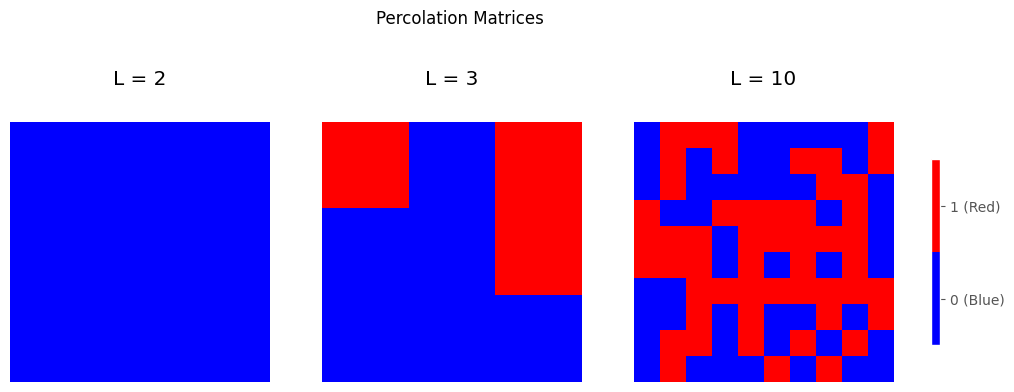

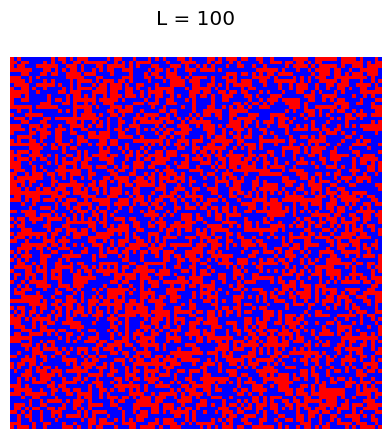

In [ ]:
#first part of this question is fairly simple,i will make a function to return resulting matrix(filled with 0s and 1s)
np.random.seed(0)
def Percolation(L,p):
  matrix=np.random.rand(L,L)
  return (matrix<=p).astype(bool)

#lets check how it works
L2=Percolation(2,0.5)
L3=Percolation(3,0.5)
L10=Percolation(10,0.5)
L100=Percolation(100,0.5)

fig,ax=plt.subplots(1,3,figsize=(12,5))
cmap=mcolors.ListedColormap(['blue','red'])#i represent 0s with blue and 1s with red
ax[0].matshow(L2,cmap=cmap)
ax[0].grid(visible=False)
ax[1].matshow(L3,cmap=cmap)
ax[1].grid(visible=False)
ax[2].matshow(L10,cmap=cmap)
ax[2].grid(visible=False)
ax[0].set_title('L = 2',pad=10)
ax[1].set_title('L = 3',pad=10)
ax[2].set_title('L = 10',pad=10)
cbar = fig.colorbar(ax[2].images[0],ax=ax,orientation='vertical',fraction=0.01,pad=0.04)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['0 (Blue)', '1 (Red)'])
fig.suptitle('Percolation Matrices')
for a in ax:
  a.axis("off")

plt.show()

plt.matshow(L100,cmap=cmap)
plt.grid(visible=False)
plt.axis("off")
plt.title('L = 100')
plt.show()

In [ ]:
#now i make a function that calculate the resulting matrix has transverse percolation or not,here i used Depth-First Search (DFS) algorithm,it is one of the common graph algorithm for this kind of questions
def can_traverse_matrix(matrix):
    rows = len(matrix)
    cols = len(matrix[0])

    for i in range(rows):
        if matrix[i][0] == 1:
            if dfs(matrix, i, 0, set()):
                return 1
    return 0


def dfs(matrix, row, col, visited):
    rows = len(matrix)
    cols = len(matrix[0])

    if col == cols - 1:
        return True

    visited.add((row, col))
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    for dr, dc in directions:
        new_row, new_col = row + dr, col + dc
        if (0 <= new_row < rows and 0 <= new_col < cols and
            matrix[new_row][new_col] == 1 and
            (new_row, new_col) not in visited):
            if dfs(matrix, new_row, new_col, visited):
                return True

    visited.remove((row, col))
    return False


print(can_traverse_matrix(L10))#here you can see it algorithm works!





1


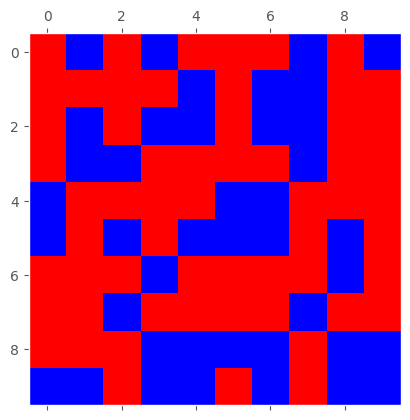

0

In [ ]:
mat=Percolation(10,0.6)
plt.matshow(mat,cmap=cmap)
plt.grid(visible=False)
plt.show()
can_traverse_matrix(mat)

# **2.Coloring algorithm**

In [ ]:
def coloring(L,p):
  mat=np.zeros(shape=(L,L),dtype=np.uint64)
  mat[:,0] = 1
  mat[:,-1] = L*L
  probab=np.random.rand(L ,L )
  counter = 2
  for i in range(L ):
    for j in range(1,L-1 ):
      if probab[i,j] <= p:
        mat[i,j]=counter
        counter+=1

        if mat[i,j] != 0:
          neighbours = [ (-1 ,0 ) , (1 ,0 ) , (0 ,-1 ) , (0 ,1 ) ]
          nonzero=[]

          for x,y in neighbours:
            if 0<= i+x <L and 0<=j+y<L and mat[i+x,j+y] != 0:
              nonzero.append([x,y])

          if len(nonzero)==0:
            continue
          if len(nonzero)==1:
            mat[i,j]=mat[i+nonzero[0][0],j+nonzero[0][1]]

          else:
            neighbours_value=np.array([mat[i+x,j+y] for x,y in nonzero])
            v=np.min(neighbours_value)
            mat[i,j]=v
            for x,y in nonzero:
              mat[i+x,j+y]=v


  if np.any(mat[:,-1]==1):
    return (mat,1)
  else:
    return (mat,0)









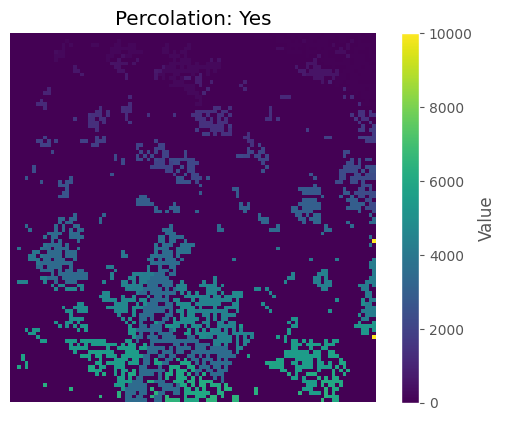

In [ ]:
mat, result = coloring(100, 0.675)

plt.imshow(mat[:,:-1], cmap='viridis')#here i droped the right side for better visualization,it doesnt matter in the final result if we keep it
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(label='Value')

plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

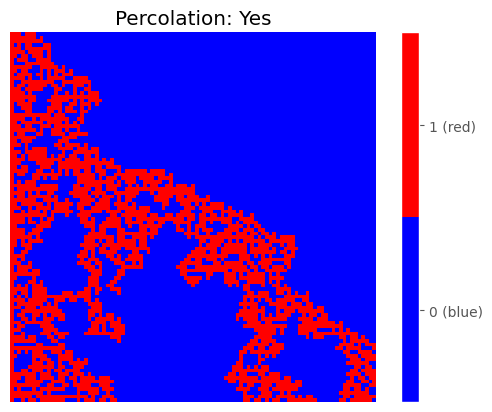

In [ ]:
mat[mat!=1]=0#for better visualization i only kept 1s
plt.imshow(mat[:,:-1], cmap=ListedColormap(['blue','red']))
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(fraction=0.05,pad=0.05)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['0 (blue)', '1 (red)'])
plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

# **3.Hoshen-Kopelman**

In [ ]:
def Hoshen_Kopelman(L,p):
  mat = np.zeros(shape = (L,L), dtype = np.uint64)
  mat[:,0] = 1
  probability=np.random.rand(L,L)
  Label=[0,1]
  S=[0,0]

  for j in range(1,L):
    for i in range(L):
      if probability[i,j] <= p:
        neighbors = [ (-1,0) , (0,-1) ]
        nonzero_neighbors=[]
        for x,y in neighbors:
          if 0<= i+x <L and 0<=j+y<L and mat[i+x,j+y] != 0:
            nonzero_neighbors.append(mat[i+x,j+y])
        if len(nonzero_neighbors)==0:
          mat[i,j] = Label[-1] + 1
          Label.append(Label[-1] + 1)
          S.append(1)

        elif len(nonzero_neighbors) == 1:
          mat[i,j] = nonzero_neighbors[0]
          S[nonzero_neighbors[0]]+=1
        else:
          min_label = min(nonzero_neighbors)
          mat[i, j] = min_label
          for label in nonzero_neighbors:
            if label != min_label:
              S[min_label] += S[label]+1
              S[label] = 0
              mat[mat == label] = min_label

  if np.any(mat[:,-1]==1):
    return (mat,S,1)
  else:
    return (mat,S,0)

mat , S, result = Hoshen_Kopelman(100,0.6)

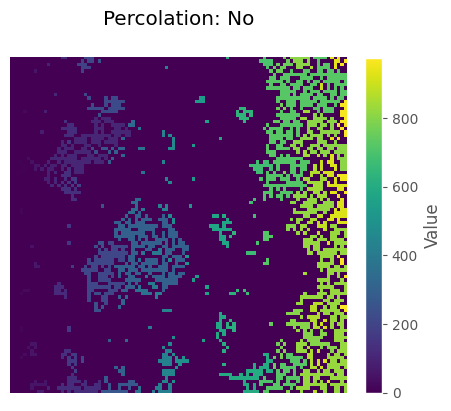

In [ ]:
plt.matshow(mat,cmap='viridis')
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(fraction=0.045,label='Value')
plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

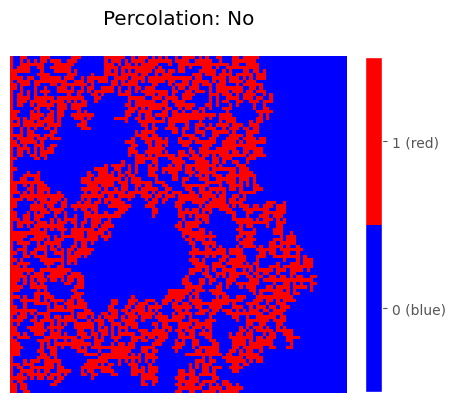

In [ ]:
#for better visualization i only keep 1s and assign 0 to other labels
mat[mat!=1]=0
plt.matshow(mat,cmap=ListedColormap(['blue','red']))
plt.grid(visible=False)
plt.axis('off')
cbar = plt.colorbar(fraction=0.045)
cbar.set_ticks([0.25,0.75])
cbar.set_ticklabels(['0 (blue)','1 (red)'])
plt.title(f"Percolation: {'Yes' if result == 1 else 'No'}")
plt.show()

In [ ]:
%time mat,s,result=Hoshen_Kopelman(1000,0.6)

CPU times: user 1min 1s, sys: 150 ms, total: 1min 1s
Wall time: 1min 3s


In [ ]:
%time mat,result=coloring(1000,0.6)

CPU times: user 8.08 s, sys: 19.1 ms, total: 8.1 s
Wall time: 8.18 s
